In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/BRCA Data.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [ ]:
#null vaule check
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [ ]:
df.shape

(341, 16)

In [ ]:
#drop null values
df.dropna(inplace=True)
df.shape

(317, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [ ]:
df.Gender.value_counts() #highly imbalanced

FEMALE    313
MALE        4
Name: Gender, dtype: int64

In [ ]:
print('Patient Status in percentage')
round(df.Patient_Status.value_counts()*100/len(df),1)

Patient Status in percentage


Alive    80.4
Dead     19.6
Name: Patient_Status, dtype: float64

**Visualization**

In [ ]:
Patient_Status = df['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole = .60,
                title='Patient Status')

figure.show()

In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [ ]:
stage = df['Tumour_Stage'].value_counts()
transactions = stage.index
quantity = stage.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole = .50,
                title='Tumour Stages of Patients')

figure.show()

In [ ]:
histology = df['Histology'].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole = .50,
                title='Histology of Patients')

figure.show()

In [ ]:
ER_status = df['ER status'].value_counts()
transactions = ER_status.index
quantity = ER_status.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole = .50,
                title='ER Status')

figure.show()

# no distinct values in this columns ; no need to use this feature and increase computational cost.

In [ ]:
PR_status = df['PR status'].value_counts()
transactions = PR_status.index
quantity = PR_status.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole = .50,
                title='PR Status')

figure.show()

In [ ]:
HER2_status = df['HER2 status'].value_counts()
transactions = HER2_status.index
quantity = HER2_status.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole = .50,
                title='HER2_status')

figure.show()

In [ ]:
#drop features
df.drop(['Patient_ID','PR status','ER status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [ ]:
df.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

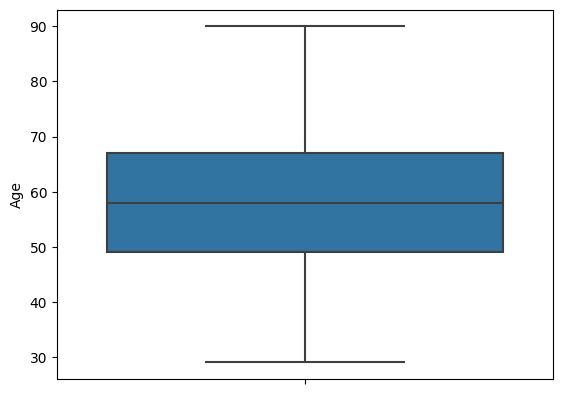

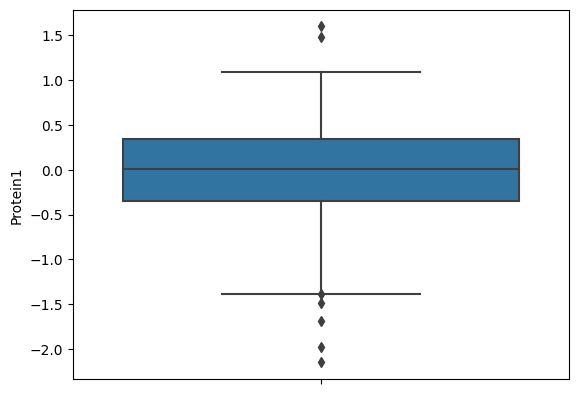

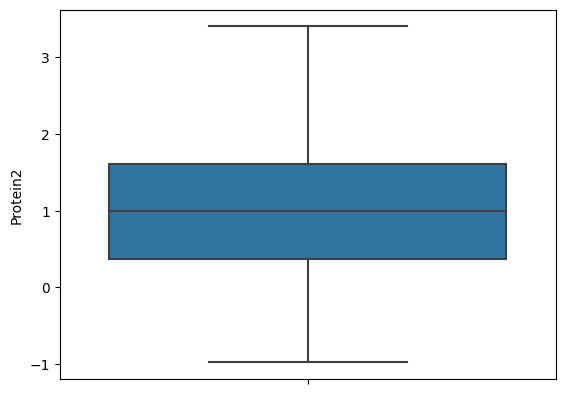

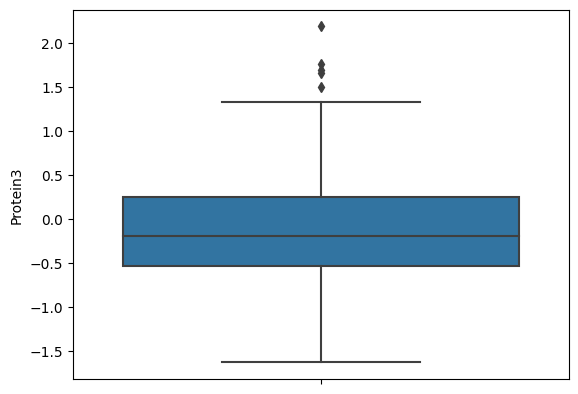

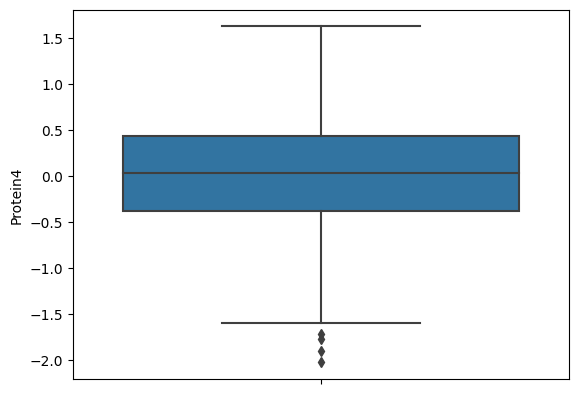

In [ ]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
  plt.figsize=(10,5)
  sns.boxplot(y=df[i])
  plt.show()

In [ ]:
!pip install pandas.profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ddcea46527c5479f823e6572fe1fcca8223f252ac11ed996f87cecaf64072580
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
ProfileReport(df,title='EDA Report of Brest Cancer Dataset')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# jd = pd.read_json('config.json')
# jd

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.9 MB/s eta 0:0

In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
from pycaret.classification import *

In [ ]:
cancer =  setup(data=df, target = 'Patient_Status',
                normalize = True,
                transformation=True,
                log_experiment = True,
                remove_multicollinearity= True, # drop one of the two features that are highly correlated with each other
                numeric_imputation = 'median',
                #ignore_features=['Patient_ID']
                #data_features=['Date_ofSurgery','Date_of_last_Visit'],
                #fix_imbalance = False,
                fold = 5, #statified k-fold cross validation
                train_size=0.70
                )

,Description,Value
0,Session id,6787
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 11)"
5,Transformed data shape,"(317, 18)"
6,Transformed train set shape,"(221, 18)"
7,Transformed test set shape,"(96, 18)"
8,Ordinal features,2
9,Numeric features,5


2023/10/09 11:25:36 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


**Building ML model**


*   'lr' = Logistic Regression
*   'knn' = K Neighbors Classifier
*   'nb'= Naive Bayes
*   'dt' = Decision Tree Classifier
*   'svm'= Support Vector Machine - SVM Liner Kernel
*   'rbfsvm' = SVM Radial Kernel
*   'gpc' = Gaussian Process Classifier
*   'mlp' = Multi Layer Perceptron Classifier
*   'ridge' = Ridge Classifier
*   'rf' = Randomo Forest Classifier
*   'qda' = Quadratic Discriminant Analysis
*   'ada' = Ada Boost Classifier
*   'gbc'  = Gradiant Boosting Classifier
*   'lda' = Linear Discriminant Analysis
*   'et' = Extra Tree Classifier
*   'xgboost' = Extreme Gradiant Boosting
*   'lightgbm' = Light Gradiant Boosting Machine
*   'catboost' = CatBoost Classifier



In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.4105,0.0000,0.0000,0.0000,-0.0417,-0.0754
1,0.8182,0.6007,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8182,0.3351,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7955,0.3476,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7727,0.3762,0.0000,0.0000,0.0000,-0.0427,-0.0773
Mean,0.7965,0.4140,0.0000,0.0000,0.0000,-0.0169,-0.0305
Std,0.0193,0.0969,0.0000,0.0000,0.0000,0.0207,0.0374


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#check all available configuration
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X_test')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
198,49.0,FEMALE,-0.064497,-0.87132,0.86880,0.316620,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
302,68.0,FEMALE,-0.055157,-0.45553,0.16324,-0.735110,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy
115,47.0,FEMALE,0.581180,0.94321,-0.22693,0.366860,III,Infiltrating Lobular Carcinoma,Negative,Other
226,51.0,FEMALE,0.187620,2.66390,1.19560,0.186400,III,Infiltrating Lobular Carcinoma,Negative,Modified Radical Mastectomy
276,63.0,FEMALE,-0.037253,1.09070,-0.42381,-0.305360,I,Infiltrating Ductal Carcinoma,Positive,Simple Mastectomy
...,...,...,...,...,...,...,...,...,...,...
237,46.0,FEMALE,0.765820,0.52405,-0.15717,0.143900,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
274,65.0,FEMALE,-0.002021,0.81402,-0.33155,-0.062663,II,Infiltrating Lobular Carcinoma,Negative,Other
43,45.0,FEMALE,0.425380,1.26280,-0.71996,-1.164100,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy
110,38.0,FEMALE,-0.629850,2.29990,0.11346,-1.036800,II,Infiltrating Lobular Carcinoma,Negative,Lumpectomy


In [ ]:
get_config('X_test_transformed')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_III,Tumour_Stage_I,Tumour_Stage_II,Histology_Infiltrating Lobular Carcinoma,Histology_Infiltrating Ductal Carcinoma,Histology_Mucinous Carcinoma,HER2 status,Surgery_type_Other,Surgery_type_Modified Radical Mastectomy,Surgery_type_Lumpectomy,Surgery_type_Simple Mastectomy
198,-0.728657,-0.135769,-0.150875,-1.912758,1.481089,0.458693,1.657034,-0.455687,-1.130642,-0.575609,0.624449,-0.18086,-0.315440,-0.695141,1.601411,-0.512696,-0.477261
302,0.740786,-0.135769,-0.134128,-1.509599,0.550046,-1.129857,-0.603488,-0.455687,0.884454,-0.575609,0.624449,-0.18086,-0.315440,-0.695141,-0.624449,1.950474,-0.477261
115,-0.901667,-0.135769,1.104266,-0.037730,-0.120880,0.545725,1.657034,-0.455687,-1.130642,1.737292,-1.601411,-0.18086,-0.315440,1.438556,-0.624449,-0.512696,-0.477261
226,-0.559735,-0.135769,0.316629,1.957975,1.838809,0.237845,1.657034,-0.455687,-1.130642,1.737292,-1.601411,-0.18086,-0.315440,-0.695141,1.601411,-0.512696,-0.477261
276,0.380358,-0.135769,-0.101905,0.127105,-0.514993,-0.529455,-0.603488,2.194491,-1.130642,-0.575609,0.624449,-0.18086,3.170173,-0.695141,-0.624449,-0.512696,2.095291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-0.989791,-0.135769,1.494799,-0.497809,0.010037,0.167309,1.657034,-0.455687,-1.130642,-0.575609,0.624449,-0.18086,-0.315440,-0.695141,1.601411,-0.512696,-0.477261
274,0.526481,-0.135769,-0.038023,-0.180911,-0.325858,-0.163883,-0.603488,-0.455687,0.884454,1.737292,-1.601411,-0.18086,-0.315440,1.438556,-0.624449,-0.512696,-0.477261
43,-1.079042,-0.135769,0.784770,0.321176,-1.172808,-1.685309,-0.603488,-0.455687,0.884454,-0.575609,0.624449,-0.18086,-0.315440,-0.695141,-0.624449,-0.512696,2.095291
110,-1.739005,-0.135769,-1.099408,1.524192,0.472501,-1.524289,-0.603488,-0.455687,0.884454,1.737292,-1.601411,-0.18086,-0.315440,-0.695141,-0.624449,1.950474,-0.477261


In [ ]:
get_config('target_param')

'Patient_Status'

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8055,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1340
ridge,Ridge Classifier,0.8009,0.0000,0.0000,0.0000,0.0000,-0.0085,-0.0155,0.1380
lr,Logistic Regression,0.7965,0.4534,0.0000,0.0000,0.0000,-0.0169,-0.0305,1.0980
rf,Random Forest Classifier,0.7965,0.4140,0.0000,0.0000,0.0000,-0.0169,-0.0305,0.2880
lda,Linear Discriminant Analysis,0.7919,0.4587,0.0000,0.0000,0.0000,-0.0253,-0.0449,0.1460
knn,K Neighbors Classifier,0.7827,0.5166,0.0472,0.1167,0.0671,0.0078,-0.0015,0.1440
gbc,Gradient Boosting Classifier,0.7737,0.5053,0.0944,0.3000,0.1430,0.0462,0.0603,0.3800
et,Extra Trees Classifier,0.7693,0.4607,0.0694,0.1467,0.0935,0.0048,-0.0066,0.2540
xgboost,Extreme Gradient Boosting,0.7646,0.4999,0.0694,0.2000,0.1000,0.0033,0.0037,0.1700
lightgbm,Light Gradient Boosting Machine,0.7510,0.4548,0.0500,0.1067,0.0671,-0.0344,-0.0462,0.8120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=6787, strategy='prior')

In [ ]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8182,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8182,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7727,0.0000,0.0000,0.0000,0.0000,-0.0427,-0.0773
4,0.7955,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.8009,0.0000,0.0000,0.0000,0.0000,-0.0085,-0.0155
Std,0.0169,0.0000,0.0000,0.0000,0.0000,0.0171,0.0309


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
unseen_prediction = predict_model(rf, data = df)
unseen_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.9598,0.9401,0.9442,0.9357,0.7845,0.8034


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,0.89
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,1,Alive,0.59
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,0,Alive,0.76
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,0.85
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,1,Alive,0.56


**Save RF as pickle**

In [ ]:
save_model(rf, 'model_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

In [ ]:
from pycaret.classification import load_model
loaded_model = load_model('model_rf')

Transformation Pipeline and Model Successfully Loaded


Prediction on Loaded Model

In [ ]:
unseen_prediction2 = predict_model(loaded_model, data = df)
unseen_prediction2.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.9598,0.9401,0.9442,0.9357,0.7845,0.8034


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,0.89
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,1,Alive,0.59
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,0,Alive,0.76
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,0.85
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,1,Alive,0.56


**Random Over Simplifier**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_resampled, y_resampled = ros.fit_resample(df.drop('Patient_Status',axis=1),df[['Patient_Status']])

In [ ]:
x_resampled.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [ ]:
x_resampled.shape

(510, 10)

In [ ]:
df2 = pd.concat([x_resampled,y_resampled], axis=1)
df2.shape

(510, 11)

In [ ]:
df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [ ]:
cancer2 = setup(data=df2, target = 'Patient_Status',
                normalize = True,
                transformation=True,
                log_experiment = True,
                remove_multicollinearity= True, # drop one of the two features that are highly correlated with each other
                numeric_imputation = 'median',
                #ignore_features=['Patient_ID']
                #data_features=['Date_ofSurgery','Date_of_last_Visit'],
                #fix_imbalance = False,
                fold = 5, #statified k-fold cross validation
                train_size=0.70)

,Description,Value
0,Session id,8627
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(357, 18)"
7,Transformed test set shape,"(153, 18)"
8,Ordinal features,2
9,Numeric features,5


In [ ]:
rf2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9448,0.9167,0.9167,0.9167,0.8333,0.8333
1,0.8750,0.9622,0.9167,0.8462,0.8800,0.7500,0.7526
2,0.8451,0.9214,0.9143,0.8000,0.8533,0.6907,0.6976
3,0.8451,0.9417,0.8857,0.8158,0.8493,0.6904,0.6929
4,0.8732,0.9226,0.8333,0.9091,0.8696,0.7467,0.7494
Mean,0.8710,0.9385,0.8933,0.8575,0.8738,0.7422,0.7452
Std,0.0263,0.0152,0.0322,0.0476,0.0241,0.0524,0.0507


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8878,0.9385,0.8933,0.8849,0.8884,0.7758,0.7771,0.3660
rf,Random Forest Classifier,0.8710,0.9385,0.8933,0.8575,0.8738,0.7422,0.7452,0.2920
xgboost,Extreme Gradient Boosting,0.8289,0.9321,0.8989,0.7937,0.8411,0.6582,0.6678,0.1780
lightgbm,Light Gradient Boosting Machine,0.8177,0.9129,0.9048,0.7780,0.8336,0.6360,0.6516,0.3680
gbc,Gradient Boosting Classifier,0.8176,0.9026,0.8878,0.7806,0.8296,0.6358,0.6440,0.3400
dt,Decision Tree Classifier,0.8095,0.8100,0.9216,0.7534,0.8283,0.6194,0.6373,0.1460
ada,Ada Boost Classifier,0.7617,0.8139,0.8259,0.7342,0.7756,0.5241,0.5310,0.2100
knn,K Neighbors Classifier,0.6777,0.7340,0.7640,0.6513,0.7028,0.3558,0.3615,0.2100
qda,Quadratic Discriminant Analysis,0.6304,0.6381,0.6956,0.6279,0.6458,0.2601,0.2749,0.1400
nb,Naive Bayes,0.5546,0.5958,0.5051,0.5633,0.5219,0.1094,0.1137,0.1400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=8627, verbose=0, warm_start=False)

In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9028,0.9576,0.8889,0.9143,0.9014,0.8056,0.8059
1,0.9167,0.9456,0.9167,0.9167,0.9167,0.8333,0.8333
2,0.8592,0.9222,0.9143,0.8205,0.8649,0.7187,0.7233
3,0.8732,0.9417,0.8857,0.8611,0.8732,0.7465,0.7468
4,0.8873,0.9254,0.8611,0.9118,0.8857,0.7748,0.7760
Mean,0.8878,0.9385,0.8933,0.8849,0.8884,0.7758,0.7771
Std,0.0204,0.0131,0.0205,0.0382,0.0188,0.0408,0.0395


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

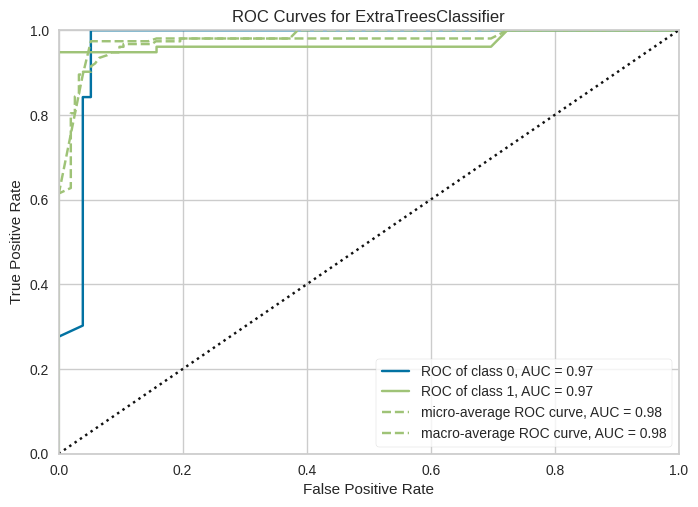

In [ ]:
plot_model(et, plot='auc')

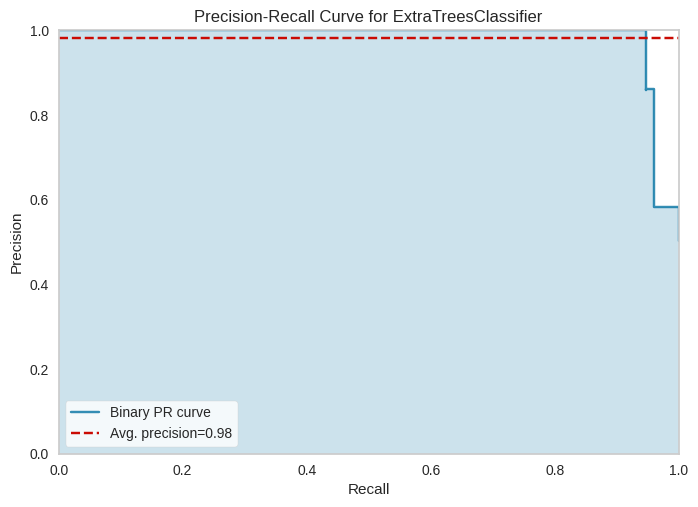

In [ ]:
plot_model(et, plot='pr')

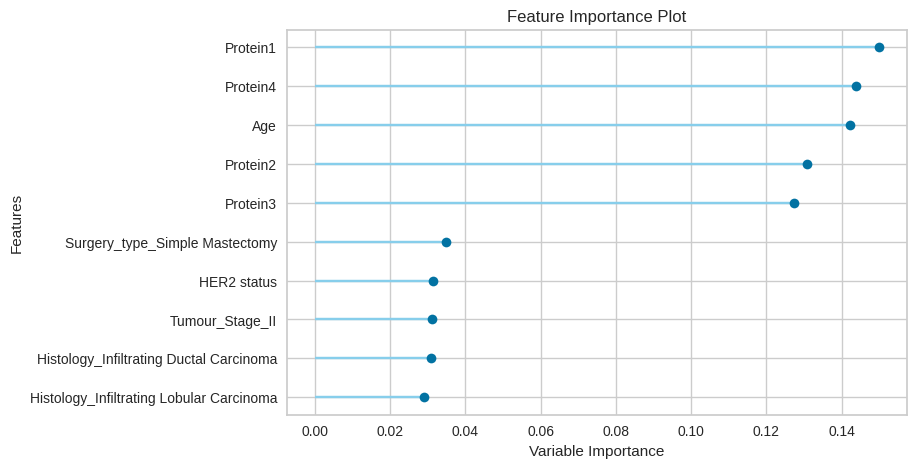

In [ ]:
plot_model(et, plot='feature')

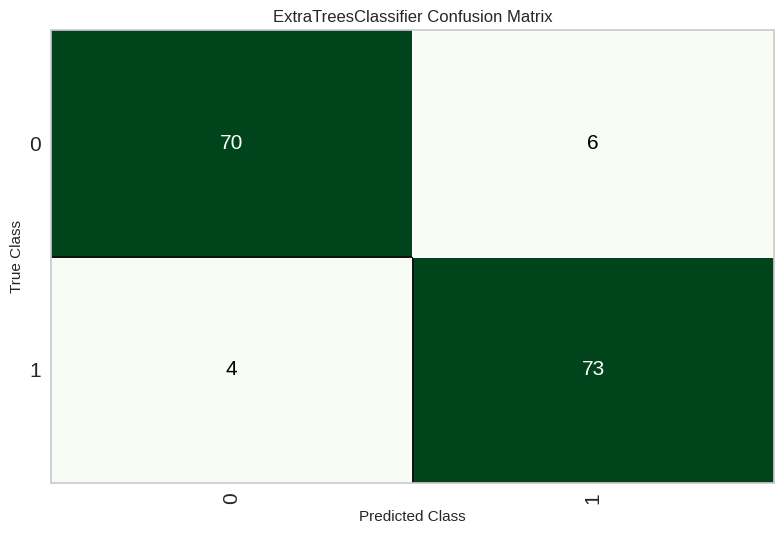

In [ ]:
plot_model(et, plot='confusion_matrix')

**Save the Extra Trees Classifier Model**

In [ ]:
save_model(et,'model_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feat

In [ ]:
loaded_model = load_model('model_et')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
unseen_prediction = predict_model(loaded_model, data = df)
unseen_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9748,0.9958,0.9748,0.9758,0.9751,0.9217,0.9224


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,1.00
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,1,Dead,1.00
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,0,Alive,0.83
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,1.00
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,1,Dead,1.00
